In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

Data Description
The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

1) Age of patient at time of operation (numerical)

2) Patient’s year of operation (year — 1900, numerical)

3) Number of positive auxillary nodes detected ((Lymph Nodes)) (numerical)

4) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

Lymph Nodes Explanation:

Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52) 
(Source: https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes)



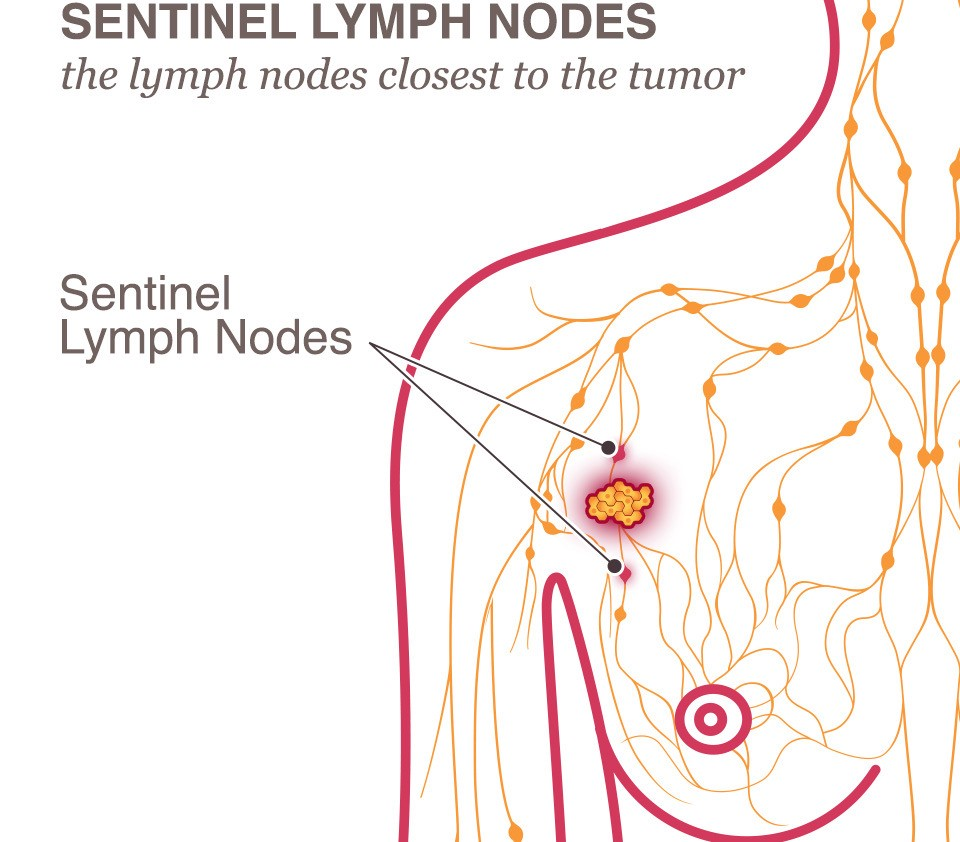

In [107]:
from IPython.display import Image
Image(filename='LymphNodes.jpeg') 

Objective :
Here the objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.

In [108]:
# Load Haberman Data Set
cancer_df=pd.read_csv('haberman.csv',header=None)
cancer_df.head(5)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [109]:
print(cancer_df.shape)

(306, 4)


In [110]:
# We can see there are no headers given in data so I will give headers names
col_Names=["Age", "Op_Year", "Pos_Aux_nodes", "Survival_status"]
cancer_df = pd.read_csv('haberman.csv' ,names = col_Names)
cancer_df.head(5)

,Age,Op_Year,Pos_Aux_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [111]:
print(cancer_df.shape)

(306, 4)


In [112]:
# What are the columns and their data types
print(cancer_df.info())
print(cancer_df.columns)
cancer_df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Op_Year            306 non-null int64
Pos_Aux_nodes      306 non-null int64
Survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB
None
Index(['Age', 'Op_Year', 'Pos_Aux_nodes', 'Survival_status'], dtype='object')


Age                int64
Op_Year            int64
Pos_Aux_nodes      int64
Survival_status    int64
dtype: object

Lets check the target set data points or How many data points for each class is present

In [113]:
cancer_df['Survival_status'].value_counts()

1    225
2     81
Name: Survival_status, dtype: int64

Observation : Dataset that does not abide by 1:1 ratio can strictly be seen as unbalanced. so we have a unbalanced dataset here¶

In [114]:
cancer_df.head(5)

,Age,Op_Year,Pos_Aux_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [115]:
cancer_df.groupby(['Op_Year'])['Survival_status'].value_counts(normalize=True)

Op_Year  Survival_status
58       1                  0.666667
         2                  0.333333
59       1                  0.666667
         2                  0.333333
60       1                  0.857143
         2                  0.142857
61       1                  0.884615
         2                  0.115385
62       1                  0.695652
         2                  0.304348
63       1                  0.733333
         2                  0.266667
64       1                  0.741935
         2                  0.258065
65       1                  0.535714
         2                  0.464286
66       1                  0.785714
         2                  0.214286
67       1                  0.840000
         2                  0.160000
68       1                  0.769231
         2                  0.230769
69       1                  0.636364
         2                  0.363636
Name: Survival_status, dtype: float64

Observation : After Grouping Grouping the Aux nodes and Operation year with survival status repectively
1) We don't get ground breaking insight but we can say that patient treated after 1966 had more chances of survival than patient from 1958 and 1959.

2) In the year 1965 least percentage of patient survived after as compared to the percentage of all the other years.

3) People with auxilary nodes = 0 have close to 86% of survival rate which is highest in the data.

4) It can also be said people with auxilary nodes = 0 and 1 have 83% survial rate 5 years after operation.

Performing high level stats of the data

In [116]:
cancer_df.describe()

,Age,Op_Year,Pos_Aux_nodes,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:
1) The Age of the patients is between 30 to 83 with the median of 52.

2) 75% of the patients have less than 5 positive lymph nodes but the max number of positive lymph goes to 52

3) 25% of the patients have 0 positive lymph nodes

4) 50% of the patients have 1 positive lymph nodes

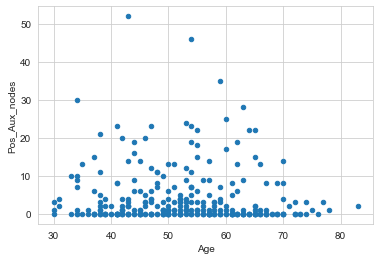

In [117]:
# lets randomly draw a scatter plot and see how our data looks like
cancer_df.plot(kind='scatter',x='Age',y='Pos_Aux_nodes')

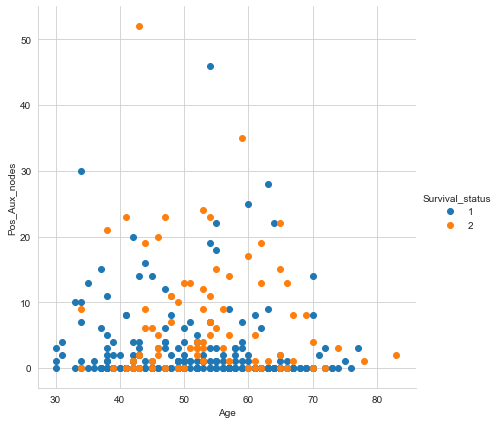

In [118]:
# 2-D Scatter plot with color-coding for each type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(cancer_df, hue="Survival_status", size=6)\
.map(plt.scatter, "Age", "Pos_Aux_nodes")\
.add_legend();
plt.show();

# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

Observations:
1) Majority of the patients have 0 positive lypmh nodes

2) If the leave out 0 positive lypmh nodes we can say that points distributed on the scatter plot are not linearly separable

Therefore, we have to check all combination/pair of features to make good classification/decision. Number of Combinations of features : 3C2 = 3 (excluding class-attribute 'Survival') Now, for these combination to analyse,Pair-Plot concept is used.

Lets try Pair Plots¶

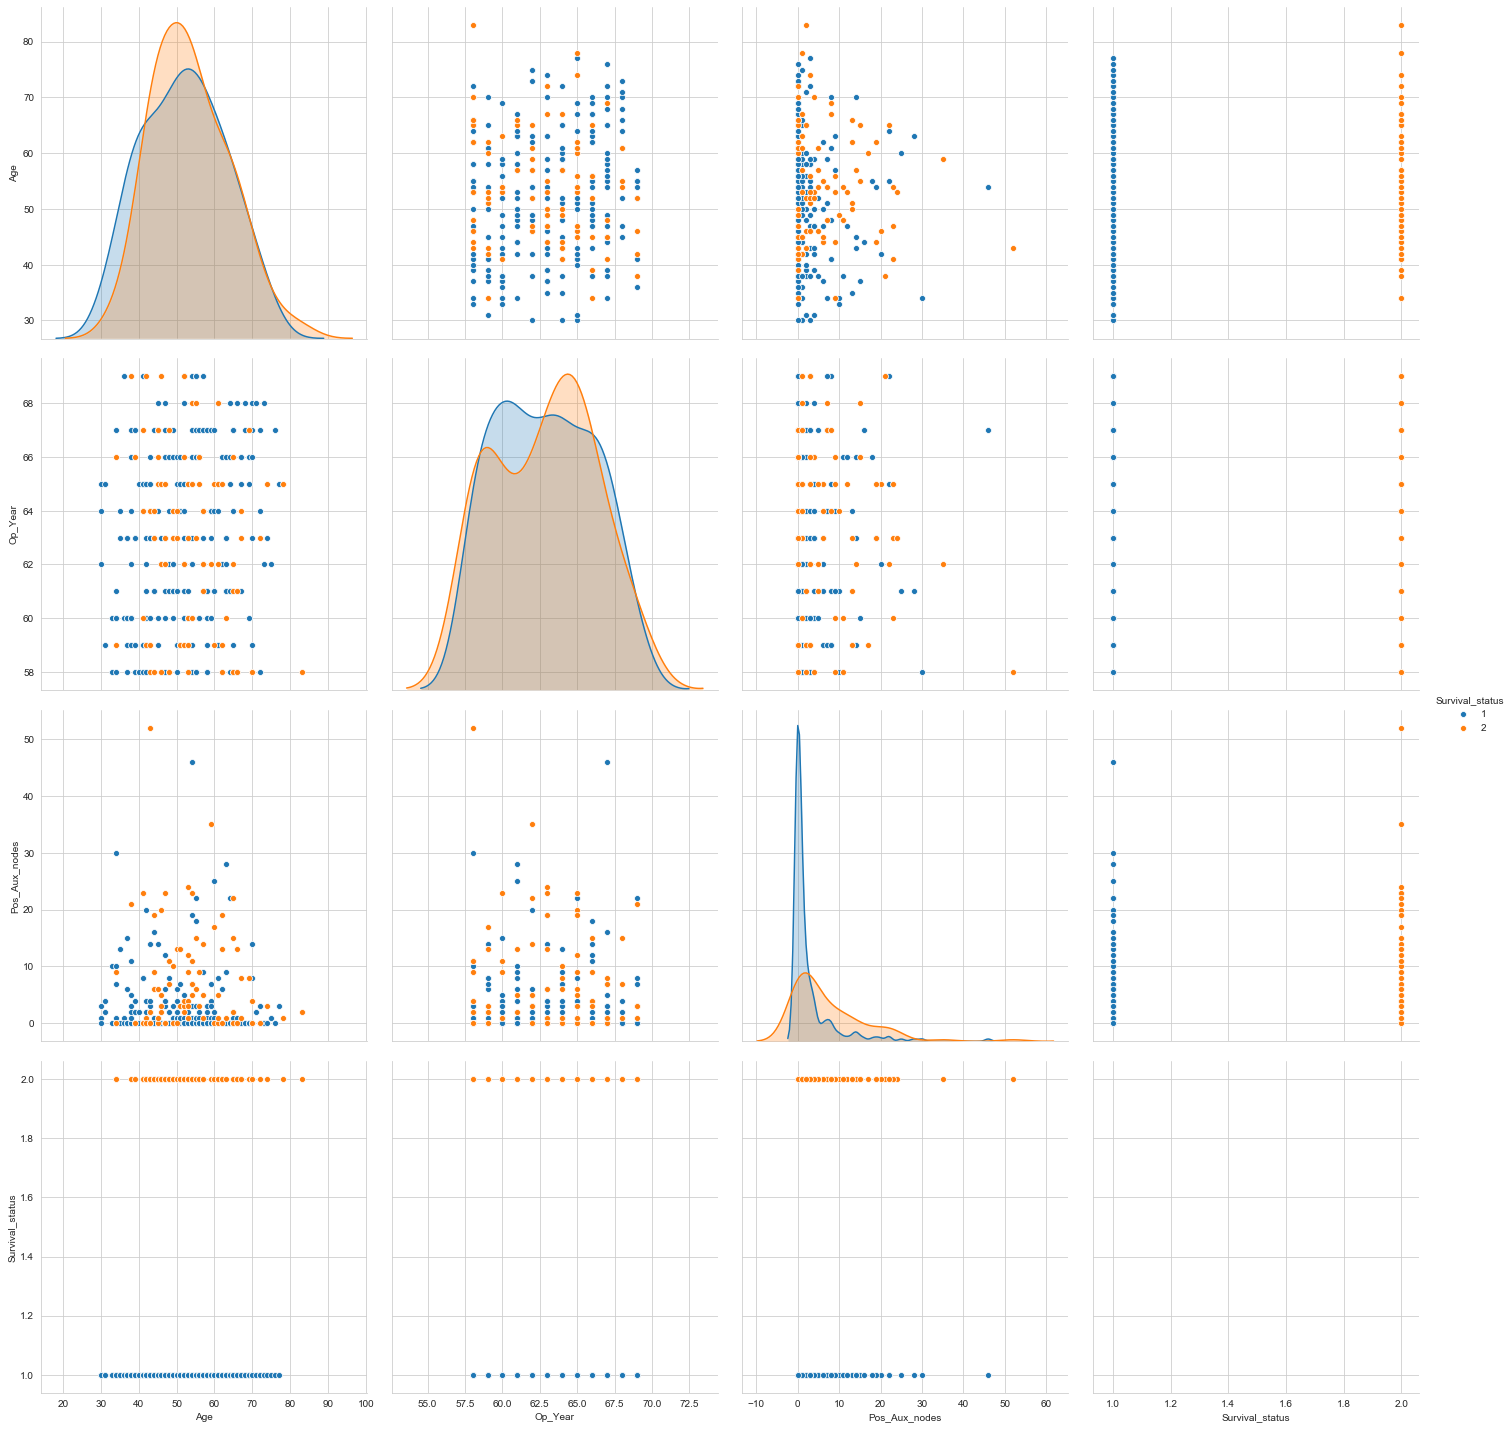

In [119]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer_df, hue="Survival_status", size=5);
plt.show()

Observations:
1) Pos_aux_nodes VS Age looks a useful plot to me because atleast we get the insight that most people who survived have 0 postive lymph nodes detected as expained earlier .

2) Leaving the 0 positive lypmh nodes we can say that points distributed on the scatter plot are not linearly separable

3) Rest all plots are not giving conclusive insights.

UNIVARIATE ANALYSIS

PDF (Probability Density Function):- It shows the density of that data or number of data present on that point. PDF will be a peak like structure represents high peak if more number of data present or else it will be flat/ small peak if number of data present is less.It is smooth graph plot using the edges of histogram

CDF (Cumulative Distribution Function):- It is representation of cumulative data of PDF ie. it will plot a graph by considering PDF for every data point cumulatively.

PDF

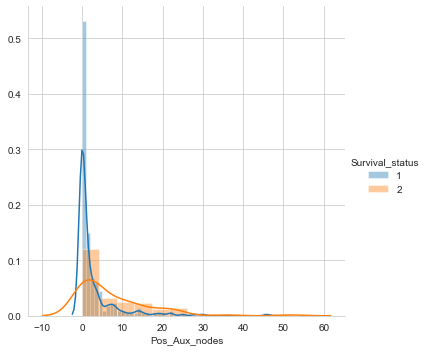

In [120]:
sns.FacetGrid(cancer_df, hue="Survival_status", size=5) \
   .map(sns.distplot, "Pos_Aux_nodes") \
   .add_legend();
plt.show();

Observation:
1) If Pos_aux_lymph is <=4 the chacnes of the survival are very high

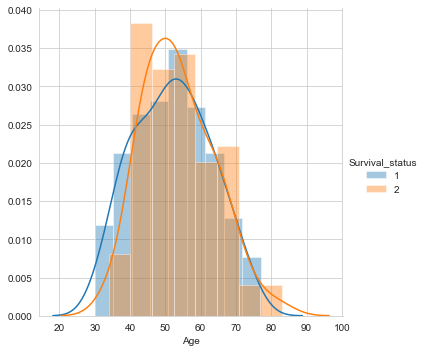

In [121]:
sns.FacetGrid(cancer_df, hue="Survival_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

Observations:
No conclusive evidence as points are overlapping.

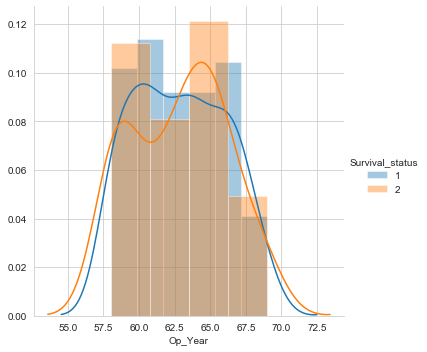

In [122]:
sns.FacetGrid(cancer_df, hue="Survival_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

Observation
1) In year 1965 there is a sudden fall in the number of people who did not survive

2) Usually in 50's the survival is rate is less as compared to early 60's except year 1965

CDF¶

In [127]:
# Now dividing the dataset in two according to the label Survival status 
# survived means status=yes and dead means status =no
cancer_df['Survival_status'] = cancer_df['Survival_status'].astype('category')
cancer_df.dtypes
cancer_df
survived=cancer_df.loc[cancer_df["Survival_status"]==1]
dead=cancer_df.loc[cancer_df["Survival_status"]==2]
print(survived.shape)
print(dead.shape)

(225, 4)
(81, 4)


In [128]:
counts, bin_edges = np.histogram(survived['Pos_Aux_nodes'], bins=10, 
                                 density = True)

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


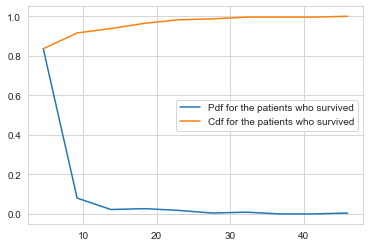

In [132]:
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survived',
            'Cdf for the patients who survived'])
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


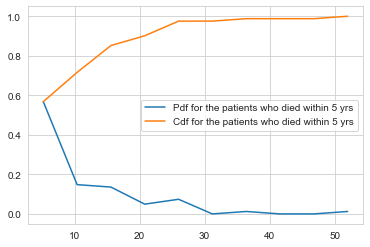

In [133]:
counts, bin_edges = np.histogram(dead['Pos_Aux_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who died within 5 yrs',
            'Cdf for the patients who died within 5 yrs'])
plt.show()

Observation:
1) People with more number of lymph nodes can be considered dead example starting 47

2) People with less number of lymph nodes have more chances of survival as shown earlier as well

Mean, Variance and Std-dev

In [134]:
survived.describe()

,Age,Op_Year,Pos_Aux_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [135]:
dead.describe()

,Age,Op_Year,Pos_Aux_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


Median, Percentile, Quantile, IQR, MAD

In [142]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(survived["Pos_Aux_nodes"]))
#Median with an outlier
print(np.median(np.append(survived["Pos_Aux_nodes"],50)))
print(np.median(dead["Pos_Aux_nodes"]))

print("\nQuantiles:")
print(np.percentile(survived["Pos_Aux_nodes"],np.arange(0, 100, 25)))
print(np.percentile(dead["Pos_Aux_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived["Pos_Aux_nodes"],90))
print(np.percentile(dead["Pos_Aux_nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["Pos_Aux_nodes"]))
print(robust.mad(dead["Pos_Aux_nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Box plot and Whiskers

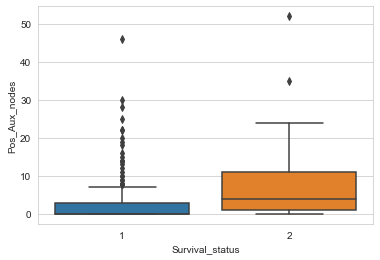

In [143]:
"""
Box plot takes a less space and visually represents the 5 number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""

sns.boxplot(x='Survival_status',y='Pos_Aux_nodes', data=cancer_df)
plt.show()

Observation:
1) If Pos_aux_lymph is <=4 the chacnes of the survival are very high

Violin plots
1) Violin plot is the combination of box plot and probability density function.

2) Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

3) The line inside violen plot is the boxplot representation

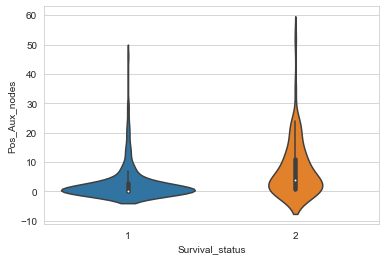

In [144]:
sns.violinplot(x="Survival_status", y="Pos_Aux_nodes", data=cancer_df, size=8)
plt.show()

Observation:
1) If Pos_aux_lymph is <=4 the chacnes of the survival are very high. Because there are more number of point for survival and the violin is fatter

2) Approx 75% of the patients have <=4 positive lymph, have survived more than 5 years.

Making Violin plot for the 3 features

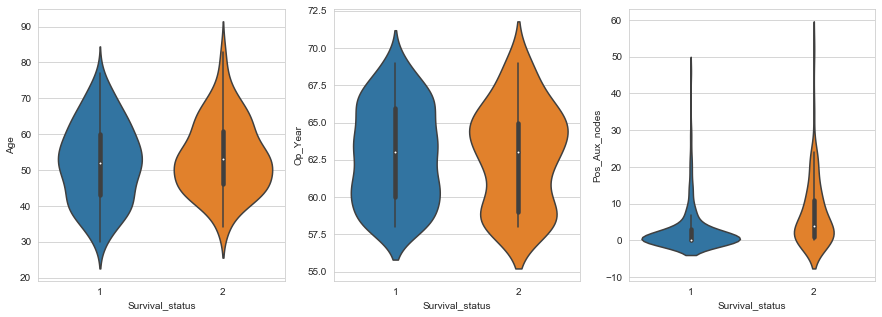

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.violinplot( x='Survival_status', y=feature, data=cancer_df, ax=axes[idx])
plt.show()

Contour plot

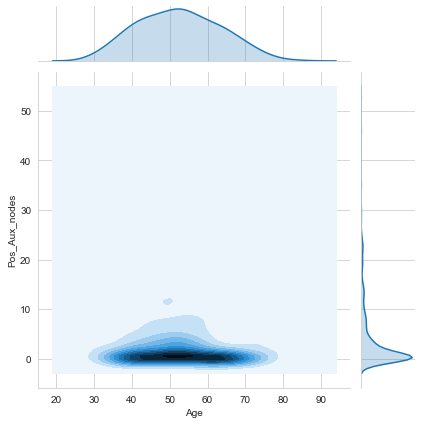

In [146]:
sns.jointplot(x="Age", y="Pos_Aux_nodes", data=cancer_df, kind="kde");
plt.show()

In [ ]:
Observation
1) People with pos lymph node =0 have survived

2) 0-4 pos lymph nodes have more chances of survival